# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [1]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### TDO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    return np.loadtxt(data_path, delimiter=",")

In [3]:
### TDO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    # If initial centers are provided, use them directly
    if init_centers is not None:
        return np.array(init_centers)

    # Otherwise choose K random data points without replacement
    random_k_points = data[np.random.choice(data.shape[0], K, replace=False)]

    return random_k_points

In [4]:
### TDO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0], dtype=int)

In [5]:
### TDO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    N = data.shape[0]
    K = centers.shape[0]
    
    distances = np.zeros((N, K))

    # For each data point
    for i in range(N):
        # For each center
        for j in range(K):
            diff = data[i] - centers[j]   # vector of size 2
            distances[i, j] = np.sqrt(np.sum(diff**2))

    return distances

In [6]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [7]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.zeros((K, data.shape[1]))  # shape (K, 2)
    
    for k in range(K):
        # Select all points assigned to cluster k
        points_in_cluster = data[labels == k]
        
        # Compute mean; handle empty clusters
        if len(points_in_cluster) > 0:
            centers[k] = points_in_cluster.mean(axis=0)
        else:
            # If no points assigned, keep previous center or assign random point
            centers[k] = data[np.random.choice(data.shape[0])]
    
    return centers

data[labels==k] creates a mask of true false and selects the rows in data with true values only

In [8]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [9]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [ ]:
### TODO 7
def visualise(data_path, labels, centers):
    

    # Load the data
    data = np.loadtxt(data_path, delimiter=',')

    K = centers.shape[0]

    # Create a scatter plot
    plt.figure(figsize=(8,6))

    # Plot each cluster with a different color
    colors = plt.cm.get_cmap('tab10', K)  # up to 10 clusters
    for k in range(K):
        cluster_points = data[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    s=50, color=colors(k), label=f'Cluster {k}')

    # Plot the cluster centers
    plt.scatter(centers[:,0], centers[:,1], s=200, c='black',
                marker='X', label='Centers')

    # Set labels and title
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    # Save the plot
    plt.savefig('kmeans.png')
    
    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.004503488540649414


C:\Users\prash\AppData\Local\Temp\ipykernel_22004\3169255953.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', K)  # up to 10 clusters


<module 'matplotlib.pyplot' from 'c:\\Users\\prash\\miniconda3\\envs\\wids_repo_env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

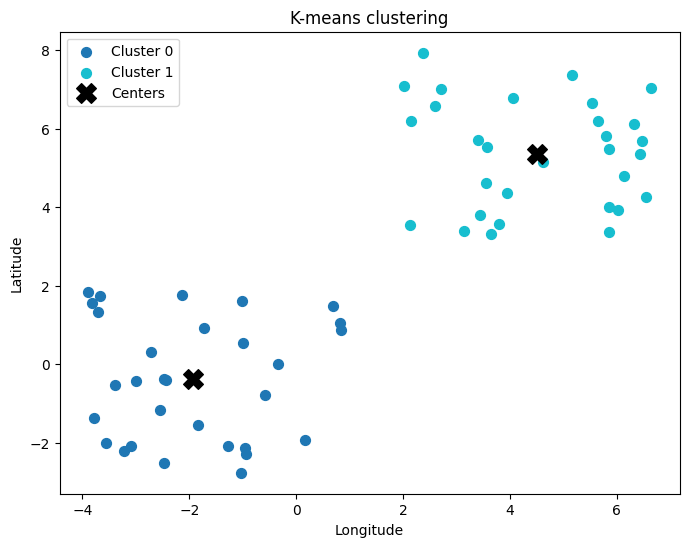

In [14]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations .txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)